In [3]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.patches import Arc
from matplotlib.pyplot import figure

In [ ]:
data = np.load("circles.npy")

In [ ]:
data.min(axis=0), data.max(axis=0)

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))

plt.xlim(-0.01, 1.01)
plt.ylim(-0.01, 1.01)
plt.gca().set_aspect('equal', adjustable='box')
ax.scatter(*data.T)

plt.show()

In [ ]:

fig, ax = plt.subplots(figsize=(8,8))

plt.xlim(-0.01, 1.01)
plt.ylim(-0.01, 1.01)
plt.gca().set_aspect('equal', adjustable='box')
ax.scatter(*data.T)

color = "y"
linewidth = 5

ax.add_patch(Arc((.448, .52), .65, .65, theta1=130, theta2=235, color=color, linewidth=linewidth))
ax.add_patch(Arc((.74, .67), .5, .5, theta1=80, theta2=190, color=color, linewidth=linewidth))
ax.add_patch(plt.Circle((.23, .8), .17, fill=False, color=color, linewidth=linewidth))
ax.add_patch(plt.Circle((.27, .25), .16, fill=False, color=color, linewidth=linewidth))
ax.add_patch(plt.Circle((.65, .32), .3, fill=False, color=color, linewidth=linewidth))
ax.add_patch(plt.Circle((.73, .27), .13, fill=False, color=color, linewidth=linewidth))

plt.show()

In [ ]:
points = np.array([[1, 2], [3, 4], [-4, 0]])


In [ ]:
points

In [ ]:
len_squared = np.linalg.norm(points, axis=1) ** 2

In [11]:
def find_circle_touching_three_points(points):
    """This adapts the formular outlined here: https://en.wikipedia.org/wiki/Circumscribed_circle#Cartesian_coordinates
    It expects three points in R2, so dim(points) = 3x2
    """

    xs = points[:,0]
    ys = points[:,1]
    ones = np.ones(len(points))
    len_squared = np.linalg.norm(points, axis=1) ** 2

    S_x = .5 * np.linalg.det(np.vstack([len_squared, ys, ones]))
    S_y = .5 * np.linalg.det(np.vstack([xs, len_squared, ones]))
    a = np.linalg.det(np.vstack([xs, ys, ones]))
    b = np.linalg.det(np.vstack([xs, ys, len_squared]))

    S = np.array([S_x, S_y])
    center = S/a

    radius = np.sqrt((b / a ) + (np.linalg.norm(S) ** 2 / a ** 2))
    return center, radius

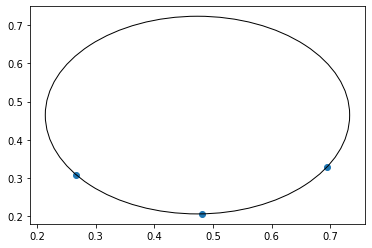

In [23]:
points = np.random.rand(3, 2)
center, radius = find_circle_touching_three_points(points)

plt.scatter(*points.T)
plt.gca().add_patch(plt.Circle(center, radius=radius, fill=False))
plt.show()

In [ ]:
! git add fitting_circles.